In [1]:
from ipynb.fs.full.GEO_RNASeq_Analysis_Functions import *

/Users/brandonbergs/anaconda2/envs/v3_8/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3254: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


# Compare EFS between groups stratified by ACE2 expression

Low ACE2 v.s. High ACE2: t-test independent samples, P_val=4.121e-02 stat=2.051e+00


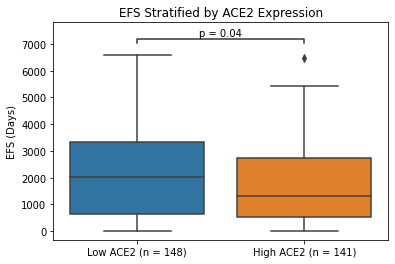

Low ACE2: median = 2011.5, mean = 2155.5135135135133, 95% CI = (1903.6566664472443, 2407.3703605797823)
High ACE2: median = 1330.0, mean = 1784.1702127659576, 95% CI = (1534.4918703323024, 2033.8485551996127)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.32 0.07      3.87

p-value = 0.06824874769809584


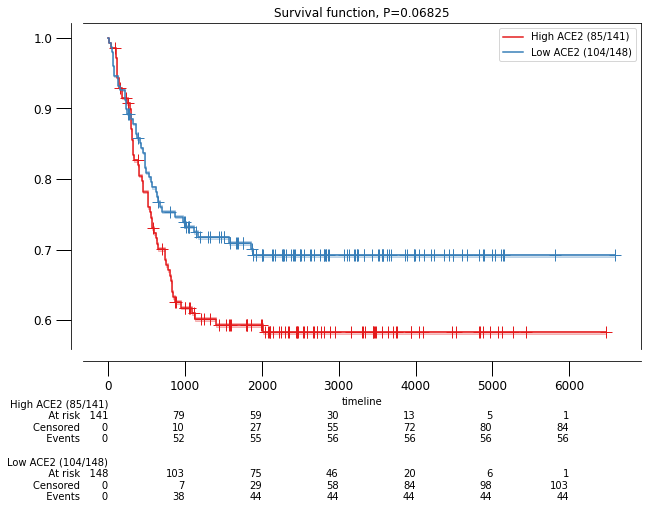

In [2]:
ACE2_groups = stratifyDataOnGeneExpression('ACE2',-0.5,0.5)
compareEFS(ACE2_groups, 'EFS Stratified by ACE2 Expression', ['Low ACE2','High ACE2'], 't-test_ind')
kaplanmeierEFS(ACE2_groups, 'Low ACE2', 'High ACE2')

Low (n=148) median survival time = inf
Low (n=148) probability of 5yr EFS = 0.7092744574138198
Intermediate (n=181) median survival time = inf
Intermediate (n=181) probability of 5yr EFS = 0.5631463820868455
High (n=141) median survival time = inf
High (n=141) probability of 5yr EFS = 0.5927603071042445


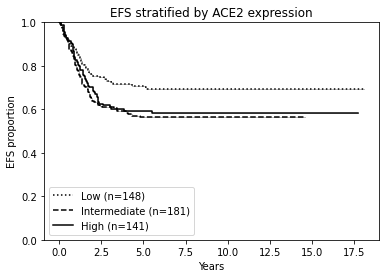

Log Rank Test between Low (n=148) and Intermediate (n=181)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           5.53 0.02      5.75

p-value = 0.01864443355769973
Log Rank Test between Low (n=148) and High (n=141)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           3.32 0.07      3.87

p-value = 0.06824874769809584
Log Rank Test between Intermediate (n=181) and High (n=141)


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic    p  -log2(p)
           0.20 0.65      0.61

p-value = 0.6531891721026404


In [3]:
groups = stratifyDataOnGeneExpression2('ACE2',-0.5,0.5)
kaplanmeierEFS2(groups, 'EFS stratified by ACE2 expression',['Low (n='+str(len(groups[0]))+')','Intermediate (n='+str(len(groups[1]))+')','High (n='+str(len(groups[2]))+')'])



# Compare ACE2 expression between samples with and without MYCN amplification

Not Amplified v.s. Amplified: t-test independent samples, P_val=3.876e-02 stat=-2.073e+00


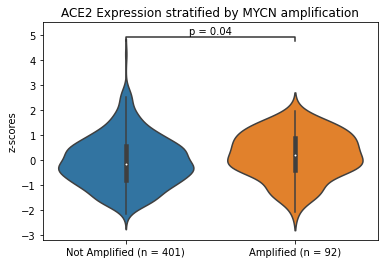

Not Amplified v.s. Amplified: t-test independent samples, P_val=3.876e-02 stat=-2.073e+00


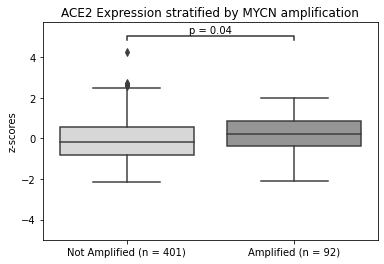

Not Amplified: median = -0.15943231317553433, mean = -0.05387240251301529
Amplified: median = 0.2108000329525927, mean = 0.18747718370857938


In [4]:
MYCN_groups = stratifyClinicalData('MYCN Amplification',[0,1])
compareExpression('ACE2',MYCN_groups,'MYCN amplification',['Not Amplified','Amplified'], 't-test_ind')

# Compare MYCN and ACE2 expression

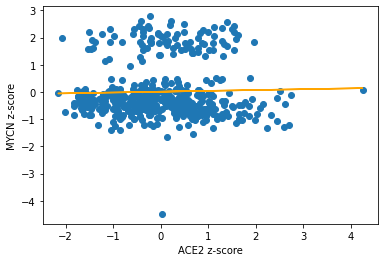

Pearson correlation coefficient = 0.02996201739092602
p-value = 0.5169999078897607


In [4]:
geneScatter('ACE2','MYCN')

# Compare EFS in MYCN nonamplified samples stratified by ACE2 expression

Low ACE2 v.s. High ACE2: t-test independent samples, P_val=5.838e-01 stat=5.486e-01


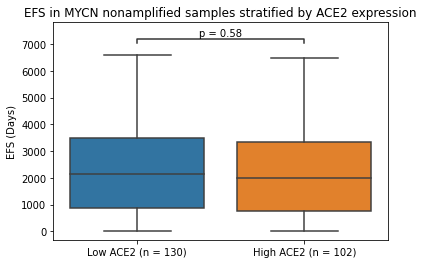

Low ACE2: median = 2137.5, mean = 2252.7153846153847, 95% CI = (1981.8344323793347, 2523.5963368514344)
High ACE2: median = 2010.5, mean = 2138.6960784313724, 95% CI = (1834.8852569985688, 2442.506899864176)


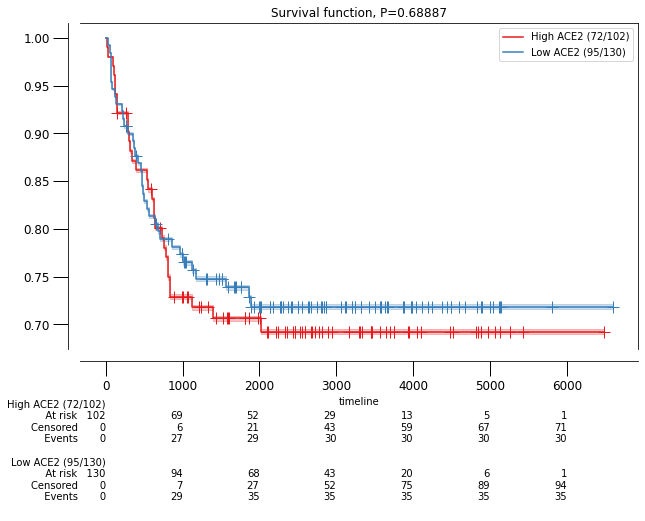

In [5]:
#Stratify samples based on MYCN amplification
MYCN_groups = stratifyClinicalData('MYCN Amplification',[0,1])

#Find z-scores for MYCN nonamplified samples
nonamp_MYCN_cols = ['RefSeqID','symbol'] + list(set(MYCN_groups[0]).intersection(z_scores.columns))
nonamp_MYCN_z_scores = z_scores[nonamp_MYCN_cols]

ACE2_groups = stratifyDataOnGeneExpression('ACE2',-0.5,0.5,z_scores=nonamp_MYCN_z_scores)
compareEFS(ACE2_groups, 'EFS in MYCN nonamplified samples stratified by ACE2 expression', ['Low ACE2','High ACE2'], 't-test_ind')
kaplanmeierEFS(ACE2_groups,'Low ACE2','High ACE2')


# Compare EFS in MYCN amplified samples stratified by ACE2 expression

Low ACE2 v.s. High ACE2: t-test independent samples, P_val=6.668e-02 stat=1.874e+00


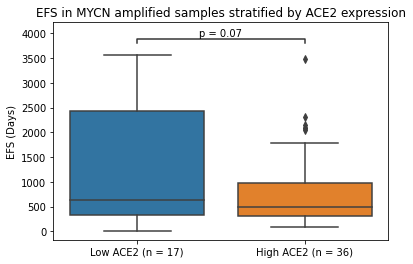

Low ACE2: median = 636.0, mean = 1372.4117647058824, 95% CI = (757.1174947803353, 1987.7060346314297)
High ACE2: median = 488.0, mean = 830.1111111111111, 95% CI = (568.105114689831, 1092.1171075323912)


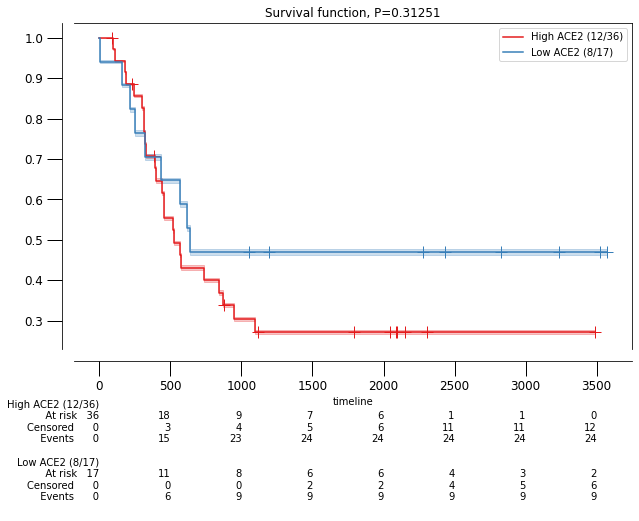

In [6]:
#Stratify samples based on MYCN amplification
MYCN_groups = stratifyClinicalData('MYCN Amplification',[0,1])

#Find z-scores for MYCN nonamplified samples
amp_MYCN_cols = ['RefSeqID','symbol'] + list(set(MYCN_groups[1]).intersection(z_scores.columns))
amp_MYCN_z_scores = z_scores[amp_MYCN_cols]

ACE2_groups = stratifyDataOnGeneExpression('ACE2',-0.5,0.5,z_scores=amp_MYCN_z_scores)
compareEFS(ACE2_groups, 'EFS in MYCN amplified samples stratified by ACE2 expression', ['Low ACE2','High ACE2'], 't-test_ind')
kaplanmeierEFS(ACE2_groups,'Low ACE2','High ACE2')


# Compare ACE2 expression between INSS Stages

1 v.s. 2: t-test independent samples, P_val=5.280e-02 stat=1.949e+00
2 v.s. 3: t-test independent samples, P_val=5.867e-01 stat=-5.450e-01
3 v.s. 4: t-test independent samples, P_val=1.404e-01 stat=-1.479e+00
4 v.s. 4S: t-test independent samples, P_val=5.570e-02 stat=-1.923e+00
1 v.s. 3: t-test independent samples, P_val=2.156e-01 stat=1.243e+00
2 v.s. 4: t-test independent samples, P_val=2.680e-02 stat=-2.228e+00
3 v.s. 4S: t-test independent samples, P_val=1.588e-02 stat=-2.449e+00
1 v.s. 4: t-test independent samples, P_val=7.816e-01 stat=-2.776e-01
2 v.s. 4S: t-test independent samples, P_val=3.369e-03 stat=-2.991e+00
1 v.s. 4S: t-test independent samples, P_val=4.736e-02 stat=-1.999e+00


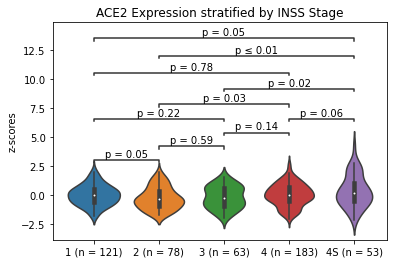

1 v.s. 2: t-test independent samples, P_val=5.280e-02 stat=1.949e+00
2 v.s. 3: t-test independent samples, P_val=5.867e-01 stat=-5.450e-01
3 v.s. 4: t-test independent samples, P_val=1.404e-01 stat=-1.479e+00
4 v.s. 4S: t-test independent samples, P_val=5.570e-02 stat=-1.923e+00
1 v.s. 3: t-test independent samples, P_val=2.156e-01 stat=1.243e+00
2 v.s. 4: t-test independent samples, P_val=2.680e-02 stat=-2.228e+00
3 v.s. 4S: t-test independent samples, P_val=1.588e-02 stat=-2.449e+00
1 v.s. 4: t-test independent samples, P_val=7.816e-01 stat=-2.776e-01
2 v.s. 4S: t-test independent samples, P_val=3.369e-03 stat=-2.991e+00
1 v.s. 4S: t-test independent samples, P_val=4.736e-02 stat=-1.999e+00


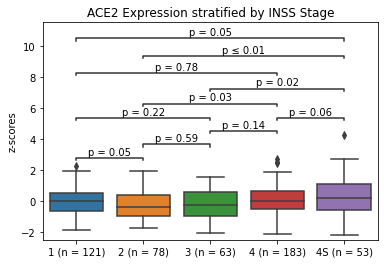

1: median = 0.025913817867491126, mean = 0.013855657661578747
2: median = -0.35029743571363703, mean = -0.2532040668187519
3: median = -0.26613281541370226, mean = -0.16394245676290944
4: median = 0.03925138064726191, mean = 0.04522766000907458
4S: median = 0.19470297442528292, mean = 0.37168945658605795


In [7]:
INSS_groups = stratifyClinicalData('INSS Stage',['1', '2', '3', '4', '4S'])
compareExpression('ACE2',INSS_groups,'INSS Stage',['1', '2', '3', '4', '4S'], 't-test_ind')

# Compare ACE2 expression between groups with and without activated TP53/PTPN6/NTRK1 pathway

In [3]:
#using z-score cutoff of 0 for activated pathway
activated_samples = []

for sample in z_scores.iloc[:,2:].columns:
    tp53_score = z_scores.loc[z_scores['symbol']=='TP53'][sample].values[0]
    ptpn6_score = z_scores.loc[z_scores['symbol']=='PTPN6'][sample].values[0]
    ntrk1_score = z_scores.loc[z_scores['symbol']=='NTRK1'][sample].values[0]
    if(tp53_score < 0 and ptpn6_score < 0 and ntrk1_score > 0):
        activated_samples.append(sample)

nonactivated_samples = list(set(z_scores.iloc[:,2:].columns) - set(activated_samples))

data = [activated_samples,nonactivated_samples]

Activated v.s. Not Activated: t-test independent samples, P_val=2.787e-07 stat=5.209e+00


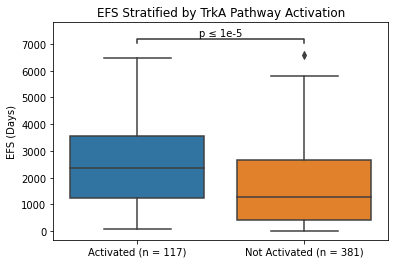

Activated: median = 2375.0, mean = 2439.136752136752, 95% CI = (2162.356866974765, 2715.916637298739)
Not Activated: median = 1262.0, mean = 1646.6666666666667, 95% CI = (1504.9520113955555, 1788.381321937778)


In [9]:
compareEFS(data, 'EFS Stratified by TrkA Pathway Activation', ['Activated','Not Activated'], 't-test_ind')

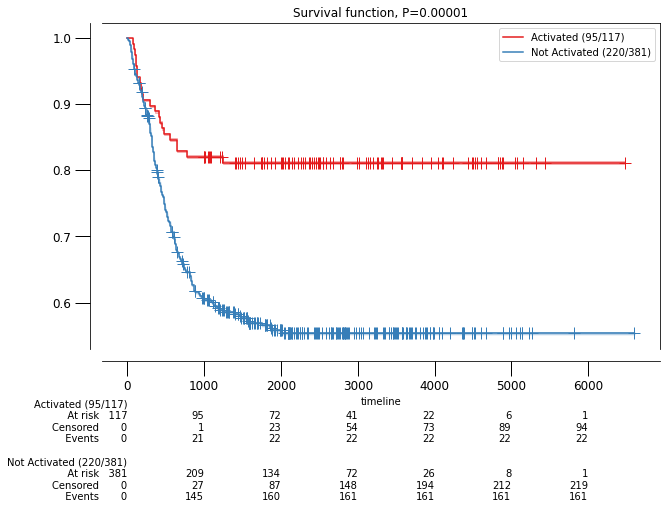

In [10]:
kaplanmeierEFS(data,'Activated','Not Activated')

Activated v.s. Not activated: t-test independent samples, P_val=4.881e-02 stat=-1.975e+00


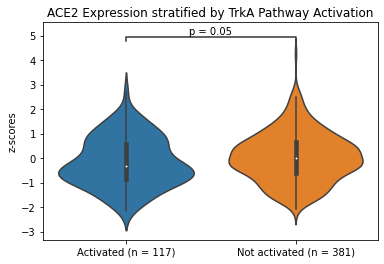

Activated v.s. Not activated: t-test independent samples, P_val=4.881e-02 stat=-1.975e+00


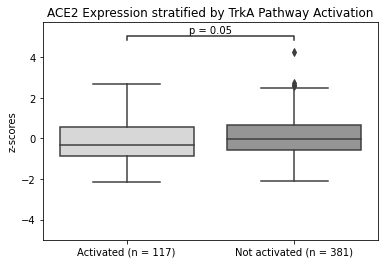

Activated: median = -0.32776155377540306, mean = -0.16850914509982862
Not activated: median = -0.0039807193975128895, mean = 0.04907134445214827


In [4]:
compareExpression('ACE2',data,'TrkA Pathway Activation',['Activated',"Not activated"],'t-test_ind')

# Age at Diagnosis Analysis

<18 months v.s. >=18 months: t-test independent samples, P_val=3.605e-02 stat=-2.102e+00


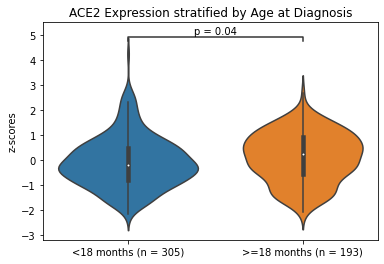

<18 months v.s. >=18 months: t-test independent samples, P_val=3.605e-02 stat=-2.102e+00


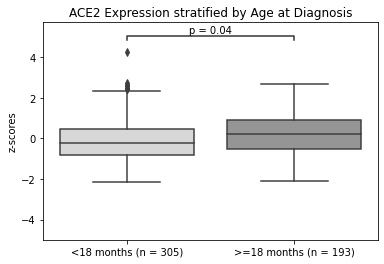

<18 months: median = -0.2045040770520017, mean = -0.07689336803242525
>=18 months: median = 0.23885490638590415, mean = 0.12167741754581657


In [2]:
groups = stratifyDataOnAge(547.5)
compareExpression('ACE2',groups,'Age at Diagnosis',['<18 months','>=18 months'],'t-test_ind')

<18 months v.s. >=18 months: t-test independent samples, P_val=1.673e-05 stat=-4.347e+00


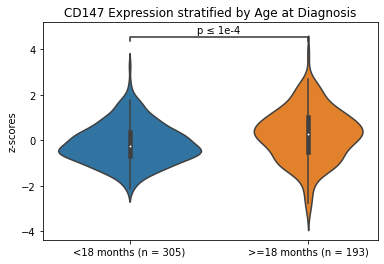

<18 months v.s. >=18 months: t-test independent samples, P_val=1.673e-05 stat=-4.347e+00


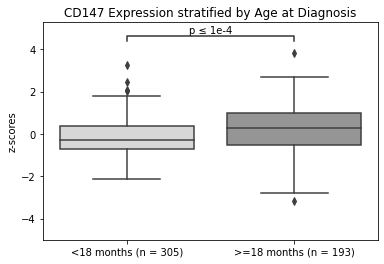

<18 months: median = -0.26949994648681885, mean = -0.15239978612100125
>=18 months: median = 0.2648532427929913, mean = 0.2408390402430331


In [4]:
groups = stratifyDataOnAge(547.5)
compareExpression2('BSG',groups,'Age at Diagnosis','CD147 Expression stratified by Age at Diagnosis',['<18 months','>=18 months'],'t-test_ind')




<18 months v.s. >=18 months: t-test independent samples, P_val=1.248e-10 stat=-6.573e+00


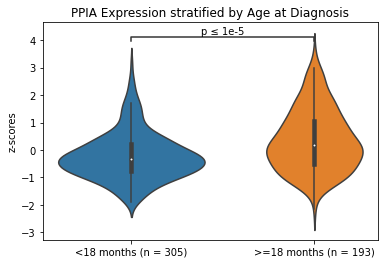

<18 months v.s. >=18 months: t-test independent samples, P_val=1.248e-10 stat=-6.573e+00


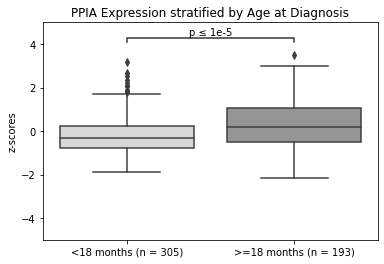

<18 months: median = -0.3150268189770338, mean = -0.2251847720828689
>=18 months: median = 0.1935056431921217, mean = 0.35586194551955747


In [5]:
groups = stratifyDataOnAge(547.5)
compareExpression('PPIA',groups,'Age at Diagnosis',['<18 months','>=18 months'],'t-test_ind')

<18 months v.s. >=18 months: t-test independent samples, P_val=1.697e-03 stat=-3.156e+00


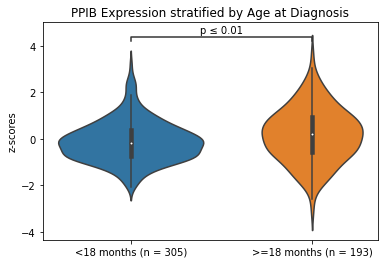

<18 months v.s. >=18 months: t-test independent samples, P_val=1.697e-03 stat=-3.156e+00


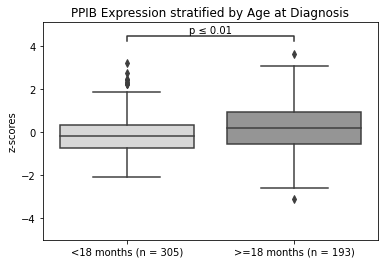

<18 months: median = -0.1771022196401225, mean = -0.11160704028389602
>=18 months: median = 0.21105251748929055, mean = 0.17637382013776182


In [6]:
groups = stratifyDataOnAge(547.5)
compareExpression('PPIB',groups,'Age at Diagnosis',['<18 months','>=18 months'],'t-test_ind')